Import neccessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm


Import preprocessed data set

In [2]:
df=pd.read_csv("preprocessed_data.csv")
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.505353,0.545455,0.200000,0.000000,0.000000,1,1,0.506735,1
1,0.481799,0.522727,0.100000,0.334031,0.000000,0,1,0.562709,0
2,0.254818,0.545455,0.800000,0.636357,0.800000,1,0,0.569654,1
3,0.676660,0.477273,0.100000,0.000000,0.400000,0,0,0.469120,0
4,1.000000,0.568182,0.200000,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...
15921,0.796021,0.635139,0.294613,0.444239,0.800000,1,0,0.800099,1
15922,0.141680,0.920881,0.690375,0.499893,0.000000,1,0,0.252670,1
15923,0.573911,0.332799,0.258921,0.482150,0.000000,0,1,0.826455,1
15924,0.611469,0.556419,0.162646,0.000000,0.874707,1,0,0.375351,1


seperate the input features and prediction feature

In [3]:
x=df.drop(columns='churn')
y=df['churn']

split data set into training set and testing set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

Define algorithams and train the model

In [6]:
param_grid = {
 'C': [1,10,20],
  'kernel': ['rbf','linear'],
  'gamma': ['scale', 'auto'],
}


grid_search = GridSearchCV(svm.SVC(), param_grid, cv=10, return_train_score=False)
grid_search.fit(x_train, y_train)

print("Grid search cv result table\n\n")
cvTable = pd.DataFrame(grid_search.cv_results_)
print(cvTable)

Grid search cv result table


    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        4.683447      0.374598         0.518045        0.145773       1   
1        4.705036      0.440385         0.260163        0.026584       1   
2        5.306166      0.417276         0.553406        0.055797       1   
3        4.746573      0.415183         0.293070        0.081776       1   
4        6.040269      0.594514         0.415925        0.009501      10   
5        6.917788      0.320559         0.294692        0.086049      10   
6        4.966340      0.434835         0.563165        0.188495      10   
7        6.872942      0.360698         0.263231        0.038966      10   
8        6.909509      0.382991         0.465791        0.128705      20   
9        8.279192      0.508857         0.299711        0.076087      20   
10       5.192756      0.301137         0.548407        0.169956      20   
11       8.263858      0.366204         0.292236        0.

visiualize grid search cv results in format

In [7]:
# Display filtered table with relevant columns
filtered_table = cvTable[['param_gamma','param_kernel','param_C','mean_test_score']]
print(filtered_table)

   param_gamma param_kernel param_C  mean_test_score
0        scale          rbf       1         0.768838
1        scale       linear       1         0.708634
2         auto          rbf       1         0.738462
3         auto       linear       1         0.708634
4        scale          rbf      10         0.782182
5        scale       linear      10         0.708085
6         auto          rbf      10         0.766954
7         auto       linear      10         0.708085
8        scale          rbf      20         0.785008
9        scale       linear      20         0.708085
10        auto          rbf      20         0.766170
11        auto       linear      20         0.708085


In [8]:
# Display the best parameters and best score found by GridSearchCV
print("\n\nBest Parameters : ", grid_search.best_params_)
print("\n\nBest Score : ",grid_search.best_score_)



Best Parameters :  {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


Best Score :  0.7850078492935636


Confusion matrix for testing data

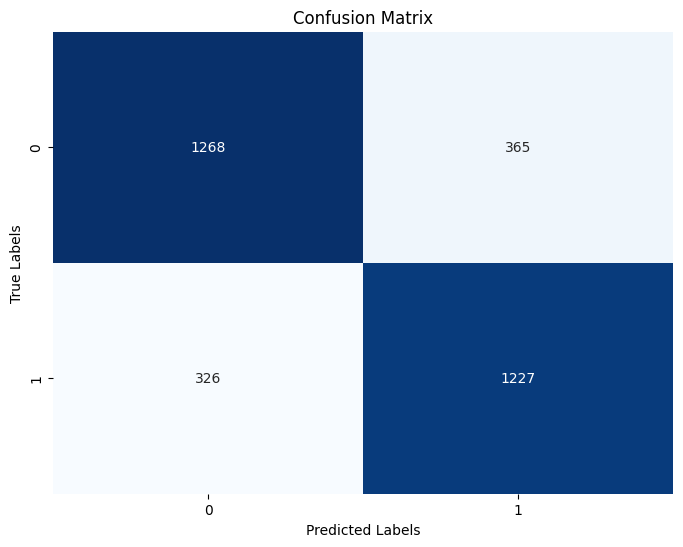

In [11]:
y_pred = grid_search.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification report

In [12]:
print("\n\n\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



accuracy of testing data set

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print ("\n\nTesting Accuracy : ",accuracy)



Testing Accuracy :  0.7831136220966729
